# Aula 17 - Meta-Learning

- Boosting, Bagging and Stacking

#### Imports das bibliotecas

In [1]:
!pip install pydataset

import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Carregando os dados

In [2]:
dataset = data('Housing')

#### Descrição

O conjunto contêm 546 observações sobre os preços de venda de casas vendidas em julho, agosto e setembro de 1987 na cidade de Windsor, Canadá.

- **price**: preço de venda de uma casa
- **lotsize**: tamanho do lote em pés quadrados
- **bedrooms**: número de quartos
- **bathrms**: número de banheiros completos
- **stories**: número de andares (excluindo porão)
- **driveway**: garagem
- **recroom**: sala de recreação
- **fullbase**: porão completo
- **gashw**: gás para aquecimento de água quente
- **airco**: ar condicionado central
- **garagepl**: número de vagas na garagem 
- **prefarea**: se é localizado no bairro preferido da cidade

#### Exploração dos dados

In [3]:
dataset.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
print('Linhas: {} e colunas: {}'.format(dataset.shape[0], dataset.shape[1]))

Linhas: 546 e colunas: 12


In [5]:
print('Colunas presentes: {}'.format(dataset.columns))

Colunas presentes: Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 55.5+ KB


#### Verificando dados nulos ou duplicados

In [7]:
print('% dados nulos:\n{}%'.format(dataset.isnull().mean()*100))

% dados nulos:
price       0.0
lotsize     0.0
bedrooms    0.0
bathrms     0.0
stories     0.0
driveway    0.0
recroom     0.0
fullbase    0.0
gashw       0.0
airco       0.0
garagepl    0.0
prefarea    0.0
dtype: float64%


In [8]:
print('% dados duplicados: {}%'.format(round(dataset.duplicated().mean()*100, 2)))

% dados duplicados: 0.18%


#### Retirando dados duplicados

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
print('Shape dataset:{}'.format(dataset.shape))

Shape dataset:(545, 12)


#### Analisando a faixa de preços das casas

In [11]:
for i, j in enumerate(np.unique(pd.qcut(dataset['price'], 3))):
    print(i, j)

0 (24999.999, 53000.0]
1 (53000.0, 74166.667]
2 (74166.667, 190000.0]


In [12]:
print('Preço máximo: $ {}'.format(dataset['price'].max()))
print('Preço mínimo: $ {}'.format(dataset['price'].min()))
print('Preço médio:  $ {} '.format(round(dataset['price'].mean(), 2)))

Preço máximo: $ 190000.0
Preço mínimo: $ 25000.0
Preço médio:  $ 68096.13 


#### Estatísticas

In [13]:
dataset.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,68096.132110,5150.541284,2.965138,1.286239,1.805505,0.693578
std,26720.565938,2170.141023,0.738064,0.502470,0.867492,0.861586
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49000.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Visualização dos dados

Text(0.5, 0, 'Lotsize')

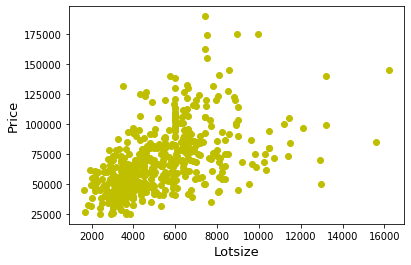

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['lotsize'], y = dataset['price'], c='y')
plt.ylabel('Price', fontsize=13)
plt.xlabel('Lotsize', fontsize=13)

#### Cria um dicionário para rotular as variáveis binárias e normaliza a coluna price

In [15]:
d = dict(zip(['no', 'yes'], range(0,2)))

for i in zip(dataset.dtypes.index, dataset.dtypes):
    if str(i[1]) == 'object':
        dataset[i[0]] = dataset[i[0]].map(d)
        
dataset['price'] = pd.qcut(dataset['price'], 3, labels=['0', '1', '2']).cat.codes

#### Correlação

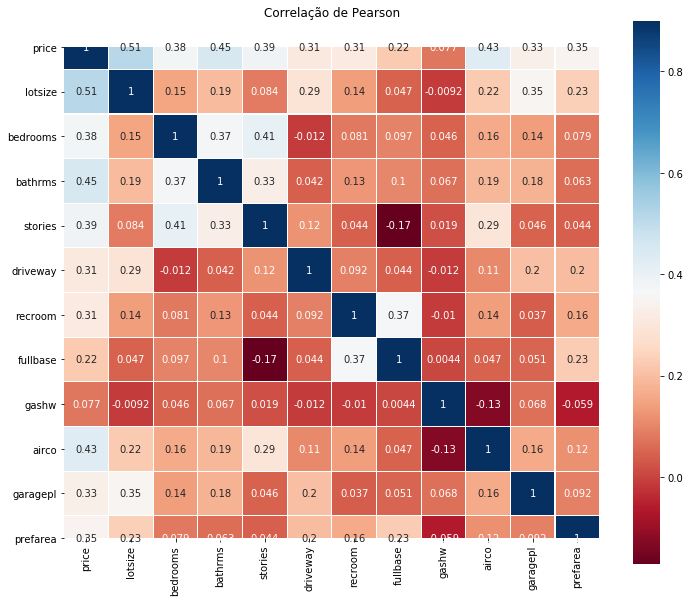

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Correlação de Pearson', y=1.05, size=12)
sns.heatmap(dataset.astype(float).corr(),linewidths=0.1, vmax=0.9, square=True, cmap=colormap, 
            linecolor='white', annot=True)

#### Separação dos dados

In [17]:
y = dataset['price']
X = dataset.drop(['price'], axis=1)

### Bagging

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [19]:
seed = 1075
np.random.seed(seed)

#### Criando os classificadores

In [20]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()

#### Comparação entre o score de cada modelo x BaggingClassifier

In [21]:
clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    
    score_model = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, n_jobs=-1)
    
    print('Mean of: {1:.2f}, std: (+/-) {2:.2f} [{0}]'.format(clf.__class__.__name__, 
                                                              score_model.mean(), score_model.std()))
    
    print('Mean of: {1:.2f}, std: (+/-) {2:.2f} [Bagging {0}]\n'.format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), 
                                                                        bagging_scores.std()))

Mean of: 0.65, std: (+/-) 0.10 [RandomForestClassifier]
Mean of: 0.65, std: (+/-) 0.08 [Bagging RandomForestClassifier]

Mean of: 0.65, std: (+/-) 0.08 [ExtraTreesClassifier]
Mean of: 0.65, std: (+/-) 0.10 [Bagging ExtraTreesClassifier]

Mean of: 0.51, std: (+/-) 0.09 [KNeighborsClassifier]
Mean of: 0.52, std: (+/-) 0.10 [Bagging KNeighborsClassifier]

Mean of: 0.57, std: (+/-) 0.08 [SVC]
Mean of: 0.57, std: (+/-) 0.08 [Bagging SVC]

Mean of: 0.64, std: (+/-) 0.06 [RidgeClassifier]
Mean of: 0.61, std: (+/-) 0.06 [Bagging RidgeClassifier]



#### Escolha por votação 

##### Agrega as previsões de cada classificador e prevê a classe que obtém mais votos

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et),
                                    ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')


for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees',
                                                     'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):

    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print('Mean: {0:.2f}, std: (+/-) {1:.2f} [{2}]'.format(scores.mean(), scores.std(), label))

Mean: 0.65, std: (+/-) 0.09 [Random Forest]
Mean: 0.64, std: (+/-) 0.09 [Extra Trees]
Mean: 0.51, std: (+/-) 0.09 [KNeighbors]
Mean: 0.57, std: (+/-) 0.08 [SVC]
Mean: 0.64, std: (+/-) 0.06 [Ridge Classifier]
Mean: 0.62, std: (+/-) 0.09 [Ensemble]


### Boosting

In [24]:
from xgboost import XGBClassifier, plot_importance
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

/home/liliane-hop/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


#### Cria os modelos

In [25]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()

#### Cria um meta-classificador de votação majoritária

In [26]:
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')

labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']

In [27]:
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print('Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]'.format(scores.mean(), scores.std(), label))

Mean: 0.631, std: (+/-) 0.105 [Ada Boost]
Mean: 0.644, std: (+/-) 0.116 [Grad Boost]
Mean: 0.624, std: (+/-) 0.097 [XG Boost]
Mean: 0.633, std: (+/-) 0.114 [Ensemble]


### Stacking

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

In [29]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('et', ExtraTreesClassifier()),
    ('knn', KNeighborsClassifier()),
    ('rg', RidgeClassifier())
]

ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [30]:
round(ensemble.fit(X_train, y_train).score(X_test, y_test), 2)

0.64